<h1>ques1 & ques2</h1>

In [45]:
import matplotlib.pyplot as plt
import numpy as np


In [46]:
!wget https://www.dropbox.com/s/4mo2tubcjngxltc/Country-data.csv

--2022-07-19 11:45:52--  https://www.dropbox.com/s/4mo2tubcjngxltc/Country-data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4mo2tubcjngxltc/Country-data.csv [following]
--2022-07-19 11:45:54--  https://www.dropbox.com/s/raw/4mo2tubcjngxltc/Country-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc28dd4cc2e0257ab33774a63ee2.dl.dropboxusercontent.com/cd/0/inline/BpVeF-a19yIp-p0ftz-QKt2hJTJ2cxiyei7Wn4J_9F5z7OeZT1xz5P2E48My-iMr0nkFgqp4bpWDbbiM6_iaiFuAwVG68xIXcsUrNgp-YySZSxzB7Fo9BxjI4CFpWOqqJBEMK9MtP9frlrn5DsdeLdnm05Xh_EQAWvp09zlxgIW0IQ/file# [following]
--2022-07-19 11:45:54--  https://uc28dd4cc2e0257ab33774a63ee2.dl.dropboxusercontent.com/cd/0/inline/BpVeF-a19yIp-p0ftz-QKt2hJTJ2cxiyei7Wn4J_9F5z7OeZT1xz5P

In [47]:
import pandas as pd


In [48]:
fil=pd.read_csv("/content/Country-data.csv")

In [49]:
fil.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [50]:
fil=fil.drop(columns="country")

In [51]:
fil.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaled = scaler.fit_transform(fil)

In [54]:
new_fil=pd.DataFrame(scaled,columns=fil.columns)

In [55]:
new_fil

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [56]:
from scipy.cluster.hierarchy import dendrogram,linkage

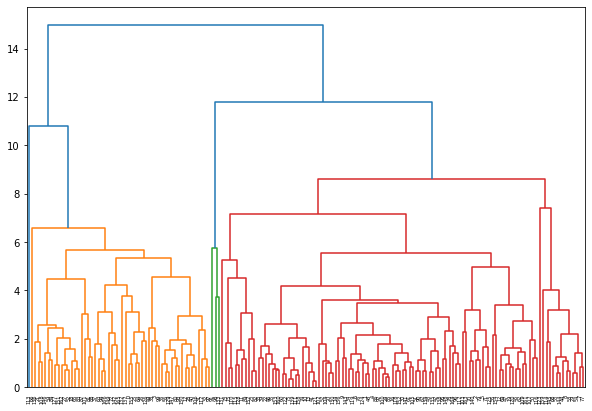

In [57]:
link = linkage(new_fil,method='complete')
plt.figure(figsize=(10,7))
dendrogram(link)
plt.show()

In [58]:
from scipy.cluster.hierarchy import cut_tree
new_fil["hierarchical_cluster_labels"]=cut_tree(link,n_clusters=4)

In [59]:
new_fil

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hierarchical_cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,0


In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

df_pca = pca.fit_transform(new_fil)

In [61]:
DF_PCA=pd.DataFrame(df_pca,columns=["PC1","PC2","PC3","PC4"])

In [62]:
DF_PCA["hierarchical_cluster_labels"]=cut_tree(link,n_clusters=4)

In [63]:
DF_PCA

,PC1,PC2,PC3,PC4,hierarchical_cluster_labels
0,-3.006985,0.123167,-0.800470,0.925003,0
1,0.480433,-0.599432,-0.197637,-1.202976,1
2,-0.208720,-0.517000,1.326123,-0.752685,1
3,-3.005853,1.655001,1.464063,0.995353,0
4,1.068704,0.135366,-0.137515,-0.863858,1
...,...,...,...,...,...
162,-0.936842,0.671210,-0.408857,-0.688011,0
163,-0.438866,-1.356516,3.148921,0.147918,1
164,0.545522,1.368126,0.001433,-1.157891,1
165,-1.965433,-0.132923,1.043466,0.191215,0


[Text(0.5, 1.0, 'How Low GDP Rate Correspons to the Child Mortality Rate')]

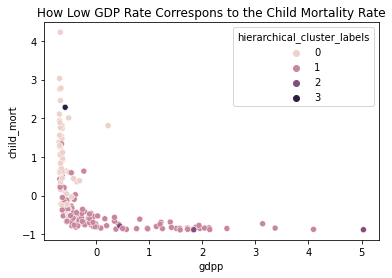

In [64]:
import seaborn as sns
sns.scatterplot(x='gdpp',y='child_mort', hue='hierarchical_cluster_labels',data=new_fil).set(title='How Low GDP Rate Correspons to the Child Mortality Rate')

<h1>ques 3</h1>

In [65]:
!wget https://www.dropbox.com/s/wvawcwg3rwp4jff/Credit%20Card%20Customer%20Data.csv

--2022-07-19 11:45:58--  https://www.dropbox.com/s/wvawcwg3rwp4jff/Credit%20Card%20Customer%20Data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wvawcwg3rwp4jff/Credit%20Card%20Customer%20Data.csv [following]
--2022-07-19 11:45:59--  https://www.dropbox.com/s/raw/wvawcwg3rwp4jff/Credit%20Card%20Customer%20Data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1552e4a07045fd99584953ed48.dl.dropboxusercontent.com/cd/0/inline/BpV0GssqREQNBBk32uOUONoLtvRkN8Dh2guVMF78x1xs0mILsLfANg9hX033hwQI2gIIvb-hKzElvUm9x5-hx5pHerctmPsq_gMRs1JJJ-Rcic7MNyNCoWxKUFHED2N8OGJkyoHF6x0RHlpQN7CLDwJZa9COiEdj-7s5DKSPnQLI4Q/file# [following]
--2022-07-19 11:46:00--  https://uc1552e4a07045fd99584953ed48.dl.dropboxusercontent.com/cd/0/inli

In [66]:
data2=pd.read_csv('Credit Card Customer Data.csv')

In [67]:
data2.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [68]:
data2.isnull().sum()


Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [69]:
data2=data2.drop(columns=["Sl_No","Customer Key"],)

In [70]:
data2.shape

(660, 5)

[]

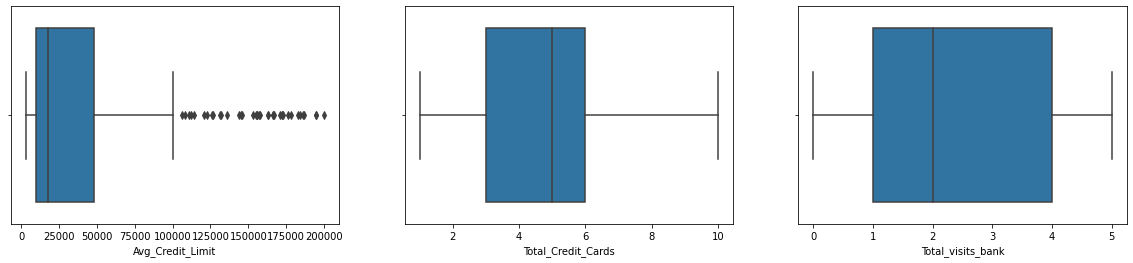

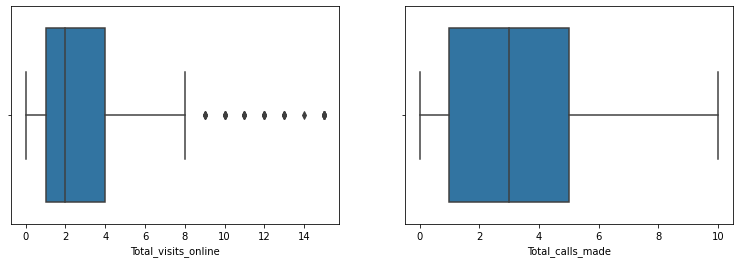

In [71]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1) 
sns.boxplot(x=data2["Avg_Credit_Limit"])
plt.plot()
plt.subplot(1,3,2)
sns.boxplot(x=data2["Total_Credit_Cards"])
plt.plot()
plt.subplot(1,3,3)
sns.boxplot(x=data2["Total_visits_bank"])
plt.plot()
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.boxplot(x=data2["Total_visits_online"])
plt.plot()
plt.subplot(1,3,2)
sns.boxplot(x=data2["Total_calls_made"])
plt.plot()

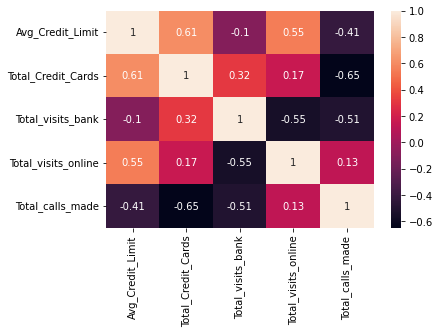

In [72]:
annot = True
sns.heatmap(data2.corr(),annot=annot)
plt.show()

In [73]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data2)

In [74]:
tr_data2=pd.DataFrame(scaled,columns=data2.columns)

In [75]:
tr_data2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [77]:
inertia = []
for i in range(2,13):
  km = KMeans(n_clusters=i)
  km.fit(tr_data2)
  inertia.append(km.inertia_)
print(inertia)

[2040.9898164784945, 933.0437490000536, 780.7736895551766, 704.4759188657507, 642.1490713311521, 599.9669556880933, 570.0412981396031, 534.586801818702, 511.8025148029526, 488.92909602535224, 462.74241450609856]


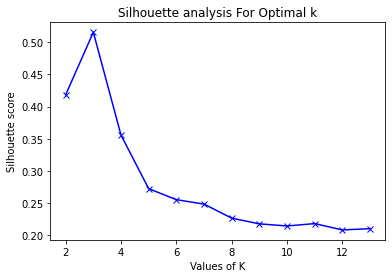

In [78]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(tr_data2)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(tr_data2, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

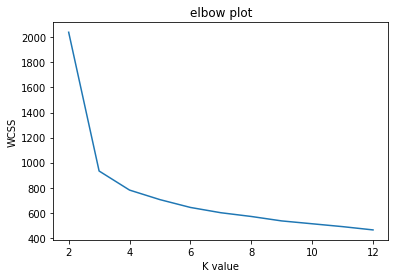

In [79]:
plt.plot(range(2,13), inertia)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.title("elbow plot")
plt.show()

In [80]:
km = KMeans(n_clusters=3)
km.fit(tr_data2)

KMeans(n_clusters=3)

In [81]:
tr_data2['cluster'] = km.labels_

In [82]:
tr_data2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [83]:
km.inertia_

933.0437490000536

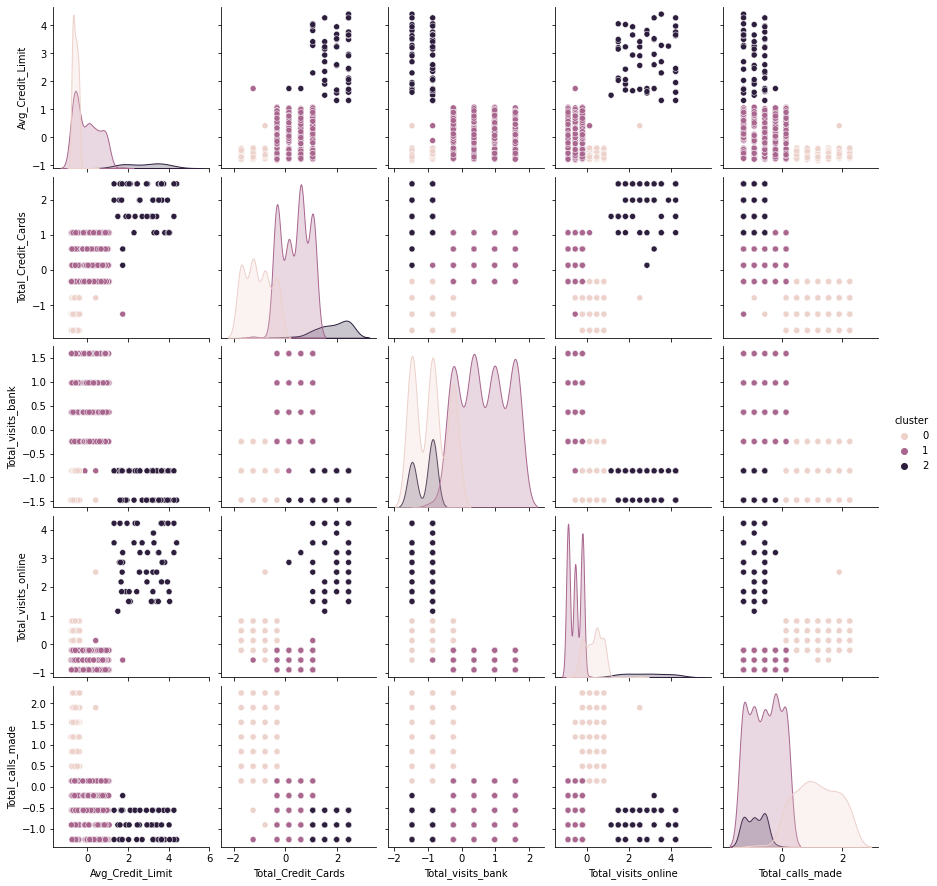

In [84]:
sns.pairplot(tr_data2,hue="cluster")

In [85]:
kmeans=KMeans(n_clusters=3,random_state=5).fit(tr_data2.drop(columns="cluster"))

In [86]:
print(np.round(kmeans.cluster_centers_,8))


[[-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]
 [ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]]


In [87]:
silhouette_score(tr_data2.drop(columns="cluster"),kmeans.labels_)

0.5157182558881063

<h1>ques 4</h1>

In [88]:
!wget https://www.dropbox.com/s/52853epzcff2b3i/Groceries%20data.csv

--2022-07-19 11:46:17--  https://www.dropbox.com/s/52853epzcff2b3i/Groceries%20data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/52853epzcff2b3i/Groceries%20data.csv [following]
--2022-07-19 11:46:18--  https://www.dropbox.com/s/raw/52853epzcff2b3i/Groceries%20data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd926676402d30de0b6653e5094.dl.dropboxusercontent.com/cd/0/inline/BpXEFzUQvqNS2C1OwGqZ__55qK-xkSE9d0AGPJJu8GpuGIpSV0Xq6HfG4wLrepBAEy_lNOqEpqNZCyE8rfChqiRzQ_Hhjhgz6tn3WXx4Jf34eTDobWm4BBEvRSykR3XUOgYZ71jL_n9wv3ah74KPDPS4Wr4Ly9wHhf0I06XZYSjzVg/file# [following]
--2022-07-19 11:46:19--  https://ucd926676402d30de0b6653e5094.dl.dropboxusercontent.com/cd/0/inline/BpXEFzUQvqNS2C1OwGqZ__55qK-xkSE9d0AGPJJu8G

In [89]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
data3=pd.read_csv("Groceries data.csv")

In [91]:
data3

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [92]:
data3[data3["Member_number"]==1001]

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,2015-01-20,frankfurter,2015,1,20,1
5695,1001,2015-02-05,frankfurter,2015,2,5,3
6612,1001,2015-04-14,beef,2015,4,14,1
9391,1001,2014-07-02,sausage,2014,7,2,2
11046,1001,2014-12-12,whole milk,2014,12,12,4
16513,1001,2015-01-20,soda,2015,1,20,1
21844,1001,2015-02-05,curd,2015,2,5,3
22761,1001,2015-04-14,white bread,2015,4,14,1
25540,1001,2014-07-02,whole milk,2014,7,2,2
27195,1001,2014-12-12,soda,2014,12,12,4


In [93]:
data3=data3.drop(columns=["year","month","day","day_of_week"])

In [94]:
data3

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


In [95]:
gk=data3.groupby(['Member_number','itemDescription']).count().unstack().fillna(0)

In [96]:
gk

Date                            \
itemDescription Instant food products UHT-milk abrasive cleaner   
Member_number                                                     
1000                              0.0      0.0              0.0   
1001                              0.0      0.0              0.0   
1002                              0.0      0.0              0.0   
1003                              0.0      0.0              0.0   
1004                              0.0      0.0              0.0   
...                               ...      ...              ...   
4996                              0.0      0.0              0.0   
4997                              0.0      0.0              0.0   
4998                              0.0      0.0              0.0   
4999                              0.0      0.0              0.0   
5000                              0.0      0.0              0.0   

                                                                    \
itemDescription artif. sweetener baby cosmetics bags baking powder   
Member_number                                                        
1000                         0.0            0.0  0.0           0.0   
1001                         0.0            0.0  0.0           0.0   
1002                         0.0            0.0  0.0           0.0   
1003                         0.0            0.0  0.0           0.0   
1004                         0.0            0.0  0.0           0.0   
...                          ...            ...  ...           ...   
4996                         0.0            0.0  0.0           0.0   
4997                         0.0            0.0  0.0           0.0   
4998                         0.0            0.0  0.0           0.0   
4999                         0.0            0.0  0.0           0.0   
5000                         0.0            0.0  0.0           0.0   

                                               ...                         \
itemDescription bathroom cleaner beef berries  ... turkey vinegar waffles   
Member_number                                  ...                          
1000                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
1001                         0.0  1.0     0.0  ...    0.0     0.0     0.0   
1002                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
1003                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
1004                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
...                          ...  ...     ...  ...    ...     ...     ...   
4996                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
4997                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
4998                         0.0  0.0     0.0  ...    0.0     0.0     0.0   
4999                         0.0  0.0     2.0  ...    0.0     0.0     0.0   
5000                         0.0  0.0     0.0  ...    0.0     0.0     0.0   

                                                                             \
itemDescription whipped/sour cream whisky white bread white wine whole milk   
Member_number                                                                 
1000                           0.0    0.0         0.0        0.0        2.0   
1001                           1.0    0.0         1.0        0.0        2.0   
1002                           0.0    0.0         0.0        0.0        1.0   
1003                           0.0    0.0         0.0        0.0        0.0   
1004                           0.0    0.0         0.0        0.0        3.0   
...                            ...    ...         ...        ...        ...   
4996                           0.0    0.0         0.0        0.0        0.0   
4997                           0.0    0.0         0.0        1.0        1.0   
4998                           0.0    0.0         0.0        0.0        0.0   
4999                           1.0    0.0         0.0        0.0        0.0   
5000   

In [97]:
from mlxtend.preprocessing import TransactionEncoder
one_hot_encoding = TransactionEncoder()

one_hot_txns = one_hot_encoding.fit(gk).transform(gk)

In [98]:
one_hot_encoding.columns_

['Date',
 'Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals'

In [99]:
one_hot_txns

array([[ True,  True, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [100]:
one_hot_txns = one_hot_txns.astype('int')
one_hot_txns

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [101]:
one_hot_txns_df = pd.DataFrame(one_hot_txns, columns = one_hot_encoding.columns_)
one_hot_txns_df

,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
def encode_units(x):
    if x <= 0:
        return 0    
    if x >= 1:
        return 1
gk_sets = gk.applymap(encode_units)

In [103]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#Generating frequent item sets that have a support of at least 7%
frequent_itemsets = apriori(gk_sets, min_support=0.07, use_colnames=True)

#Generating the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((Date, bottled beer))","((Date, whole milk))",0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
1,"((Date, whole milk))","((Date, bottled beer))",0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988
2,"((Date, bottled water))","((Date, other vegetables))",0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969
3,"((Date, other vegetables))","((Date, bottled water))",0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450
4,"((Date, bottled water))","((Date, rolls/buns))",0.213699,0.349666,0.079271,0.370948,1.060863,0.004548,1.033832
...,...,...,...,...,...,...,...,...,...
93,"((Date, whole milk), (Date, other vegetables))","((Date, yogurt))",0.191380,0.282966,0.071832,0.375335,1.326434,0.017678,1.147870
94,"((Date, yogurt), (Date, whole milk))","((Date, other vegetables))",0.150590,0.376603,0.071832,0.477002,1.266589,0.015119,1.191967
95,"((Date, other vegetables))","((Date, yogurt), (Date, whole milk))",0.376603,0.150590,0.071832,0.190736,1.266589,0.015119,1.049608
96,"((Date, yogurt))","((Date, whole milk), (Date, other vegetables))",0.282966,0.191380,0.071832,0.253853,1.326434,0.017678,1.083727


In [104]:
new_rules=rules[(rules["lift"]>=1) & (rules["confidence"]>=0.5)]

In [105]:
new_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((Date, bottled beer))","((Date, whole milk))",0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
8,"((Date, bottled water))","((Date, whole milk))",0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
10,"((Date, canned beer))","((Date, whole milk))",0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
18,"((Date, domestic eggs))","((Date, whole milk))",0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
20,"((Date, newspapers))","((Date, whole milk))",0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775
